In [434]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import estimate_bandwidth, MeanShift, DBSCAN
%matplotlib inline

plt.rcParams['font.family'] = 'AppleGothic'

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style="whitegrid")

In [435]:
df = pd.read_csv('./data/ffffinal_data.csv', encoding='cp949')
df.head()

,Unnamed: 0,동,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,소매업_자동차_제외_종사자수,숙박_음식점업_종사자수,총인구_합계,...,20대이하,20대,30대,40대,50대,60대,유동인구,자전거도로갯수,관광지개수,버스정류장 개수
0,2,동서학동,447,81,80,2,15,163,210,6784,...,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,5999.111010,6,0.0,12
1,3,서서학동,512,92,67,0,12,147,114,9223,...,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,3123.260243,2,1.0,8
2,4,중화산1동,926,172,262,6,42,518,921,15288,...,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,13356.879790,3,0.0,11
3,5,중화산2동,"2,629",353,499,2,222,834,"1,545",20030,...,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,18584.475600,6,0.0,13
4,6,평화1동,658,112,103,3,15,266,256,13204,...,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,4435.466860,5,0.0,6


In [436]:
df = df.drop(['Unnamed: 0','관광지개수','한국인_세대수'], axis=1)
df.columns

Index(['동', '전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '학교수', '학원수',
       '소매업_자동차_제외_종사자수', '숙박_음식점업_종사자수', '총인구_합계', '하천', '20대이하', '20대',
       '30대', '40대', '50대', '60대', '유동인구', '자전거도로갯수', '버스정류장 개수'],
      dtype='object')

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   동                35 non-null     object 
 1   전체산업             35 non-null     object 
 2   소매업_자동차_제외_사업체수  35 non-null     object 
 3   숙박_음식점업_사업체수     35 non-null     int64  
 4   학교수              35 non-null     int64  
 5   학원수              35 non-null     int64  
 6   소매업_자동차_제외_종사자수  35 non-null     object 
 7   숙박_음식점업_종사자수     35 non-null     object 
 8   총인구_합계           35 non-null     int64  
 9   하천               35 non-null     int64  
 10  20대이하            35 non-null     float64
 11  20대              35 non-null     float64
 12  30대              35 non-null     float64
 13  40대              35 non-null     float64
 14  50대              35 non-null     float64
 15  60대              35 non-null     float64
 16  유동인구             35 non-null     float64
 17  자전거도로갯수          3

#### numeric화

In [438]:
df_col = ['전체산업','소매업_자동차_제외_사업체수','소매업_자동차_제외_종사자수','숙박_음식점업_종사자수']

for col in df_col:
    for i in range(len(df)):
        df[col][i]= df[col][i].strip().replace(",","")
        

<ipython-input-438-0a5d5d661ffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]= df[col][i].strip().replace(",","")


In [439]:
df1 = df.iloc[:,1:].apply(pd.to_numeric)

In [440]:
df.iloc[:,1:]

,전체산업,소매업_자동차_제외_사업체수,숙박_음식점업_사업체수,학교수,학원수,소매업_자동차_제외_종사자수,숙박_음식점업_종사자수,총인구_합계,하천,20대이하,20대,30대,40대,50대,60대,유동인구,자전거도로갯수,버스정류장 개수
0,447,81,80,2,15,163,210,6784,0,2216.416667,4222.581667,6660.898333,9821.903333,11430.505000,14956.531670,5999.111010,6,12
1,512,92,67,0,12,147,114,9223,0,1776.725000,2406.133333,3339.381667,4809.505000,5222.346667,8052.013333,3123.260243,2,8
2,926,172,262,6,42,518,921,15288,1,7063.136667,12580.656670,13598.373330,18024.130000,17729.248330,23538.330000,13356.879790,3,11
3,2629,353,499,2,222,834,1545,20030,1,9930.943333,16559.766670,20152.223330,27694.336670,24293.525000,22298.698330,18584.475600,6,13
4,658,112,103,3,15,266,256,13204,0,2783.241667,3508.723333,4878.001667,6770.443333,7082.258333,8944.766667,4435.466860,5,6
5,2404,411,387,2,211,1160,1192,46295,1,21018.433330,20923.298330,30533.113330,43817.755000,40550.925000,48320.566670,27204.332270,5,23
6,3287,842,585,3,263,2653,1720,40408,1,13822.496670,23613.738330,30008.220000,42011.338330,38277.865000,35784.343330,27458.286170,6,36
7,998,121,92,0,29,224,184,12799,1,3264.638333,3902.166667,5044.966667,7041.133333,6804.763333,8173.196667,4674.016499,2,8
8,1045,273,212,1,47,554,506,14447,1,5304.563333,5724.433333,7027.961667,10368.700000,9878.655000,11976.565000,6776.238215,5,14
9,1227,173,231,5,105,618,739,23323,0,14266.081670,13183.676670,21911.456670,32869.018330,33304.173330,31027.470000,19026.216290,5,19


#### 결측값 확인

In [441]:
df.isna().sum()

동                  0
전체산업               0
소매업_자동차_제외_사업체수    0
숙박_음식점업_사업체수       0
학교수                0
학원수                0
소매업_자동차_제외_종사자수    0
숙박_음식점업_종사자수       0
총인구_합계             0
하천                 0
20대이하              0
20대                0
30대                0
40대                0
50대                0
60대                0
유동인구               0
자전거도로갯수            0
버스정류장 개수           0
dtype: int64

In [442]:
df = df.fillna(0)

## 차원 축소

In [443]:
# 스케일링
df_scaled = StandardScaler().fit_transform(df.iloc[:,1:])

In [444]:
# PCA 변환
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_trans = pca.transform(df_scaled)
print(pca_trans.shape)

(35, 2)


In [445]:
print(pca.explained_variance_ratio_)

[0.62056602 0.13402479]


**=> PCA 요소 두개로 기존 데이터를 75%정도 설명할 수 있음**

In [446]:
# SVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(df_scaled)
tsvd_trans = tsvd.transform(df_scaled)
print(tsvd_trans.shape)

(35, 2)


In [447]:
print(tsvd.explained_variance_ratio_)

[0.62056602 0.13402479]


**=> 같은 결과**

In [448]:
# 데이터프레임으로 변환

pca_columns = ['pca_1','pca_2']
df_pca = pd.DataFrame(pca_trans, columns=pca_columns)
df_pca.head()

,pca_1,pca_2
0,-3.363625,-0.888130
1,-4.475186,-0.135838
2,-0.902530,-0.259320
3,1.987462,0.979158
4,-3.632527,-0.278522


In [449]:
# '동' 칼럼과 붙이기
data = pd.concat([df['동'],df_pca], axis=1)
data.shape

(35, 3)

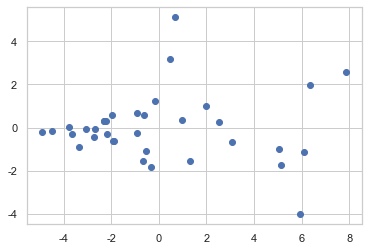

In [450]:
plt.scatter(data['pca_1'], data['pca_2'])

## 군집화

#### '동' 칼럼을 인덱스로 변경

In [451]:
jj_df = data.set_index("동")
jj_df.head()

,pca_1,pca_2
동,,
동서학동,-3.363625,-0.888130
서서학동,-4.475186,-0.135838
중화산1동,-0.902530,-0.259320
중화산2동,1.987462,0.979158
평화1동,-3.632527,-0.278522


#### Mean Shift

In [452]:
# 최적의 bandwidth 찾기
bandwidth = estimate_bandwidth(jj_df)
bandwidth

2.6171448046927654

In [453]:
meanshift = MeanShift(bandwidth=2.6)
cluster_labels = meanshift.fit_predict(jj_df)
np.unique(cluster_labels)

array([0, 1, 2, 3, 4])

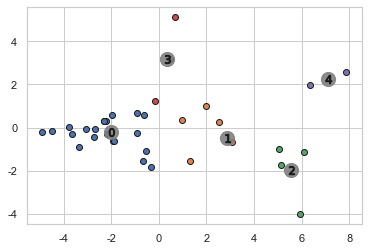

In [454]:
jj_df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['meanshift_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

#### DBSCAN

In [455]:
dbscan = DBSCAN(eps=0.8, min_samples=2, metric='euclidean')
dbscan_labels = dbscan.fit_predict(jj_df)

jj_df['dbscan_label'] = dbscan_labels
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3])

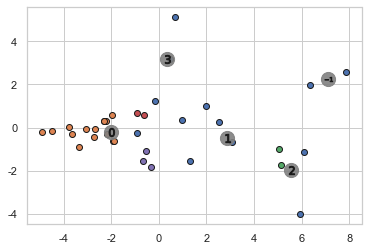

In [456]:
#centers = dbscan.cluster_centers_
unique_labels = np.unique(dbscan_labels)
# markers=['o', 's', '^', 'x']

for label in unique_labels:
    label_cluster = jj_df[jj_df['dbscan_label']==label]
    center_x_y = centers[label]
    
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['pca_1'], y=label_cluster['pca_2'], edgecolor='k') #, marker=markers[label] 
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9) #, marker=markers[label]
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

## 군집별 시각화

#### 기존 데이터에 라벨 칼럼 붙이기

In [457]:
jj_df.reset_index()

,동,pca_1,pca_2,meanshift_label,dbscan_label
0,동서학동,-3.363625,-0.888130,0,0
1,서서학동,-4.475186,-0.135838,0,0
2,중화산1동,-0.902530,-0.259320,0,-1
3,중화산2동,1.987462,0.979158,1,-1
4,평화1동,-3.632527,-0.278522,0,0
5,평화2동,5.050699,-1.001290,2,1
6,서신동,6.345399,1.952261,4,-1
7,삼천1동,-3.777057,0.019975,0,0
8,삼천2동,-2.315733,0.286693,0,0
9,삼천3동,1.320896,-1.567884,1,-1


In [458]:
df.shape

(35, 19)

In [459]:
JJ_DF = pd.merge(df,jj_df['meanshift_label'], how='outer', on='동')
JJ_DF.shape

(35, 20)

In [460]:
JJ_DF[['전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '학교수', '학원수',
       '소매업_자동차_제외_종사자수', '숙박_음식점업_종사자수', '총인구_합계', '하천', '20대이하', '20대',
       '30대', '40대', '50대', '60대', '유동인구', '자전거도로갯수', '버스정류장 개수']] = JJ_DF[['전체산업', '소매업_자동차_제외_사업체수', '숙박_음식점업_사업체수', '학교수', '학원수',
       '소매업_자동차_제외_종사자수', '숙박_음식점업_종사자수', '총인구_합계', '하천', '20대이하', '20대',
       '30대', '40대', '50대', '60대', '유동인구', '자전거도로갯수', '버스정류장 개수']].apply(pd.to_numeric)


#JJ_DF = JJ_DF.astype({'동': str})


In [461]:
JJ_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   동                35 non-null     object 
 1   전체산업             35 non-null     int64  
 2   소매업_자동차_제외_사업체수  35 non-null     int64  
 3   숙박_음식점업_사업체수     35 non-null     int64  
 4   학교수              35 non-null     int64  
 5   학원수              35 non-null     int64  
 6   소매업_자동차_제외_종사자수  35 non-null     int64  
 7   숙박_음식점업_종사자수     35 non-null     int64  
 8   총인구_합계           35 non-null     int64  
 9   하천               35 non-null     int64  
 10  20대이하            35 non-null     float64
 11  20대              35 non-null     float64
 12  30대              35 non-null     float64
 13  40대              35 non-null     float64
 14  50대              35 non-null     float64
 15  60대              35 non-null     float64
 16  유동인구             35 non-null     float64
 17  자전거도로갯수          3

#### 각 군집에 포함된 행정동 확인

In [462]:
# 0번 클러스터
JJ_DF[JJ_DF['meanshift_label']==0]['동']

0      동서학동
1      서서학동
2     중화산1동
4      평화1동
7      삼천1동
8      삼천2동
10     효자1동
11     효자2동
12     효자3동
16      완산동
19     인후1동
20     인후2동
23     금암1동
24     금암2동
25      팔복동
26     우아1동
27     우아2동
28      호성동
31      조촌동
32      진북동
33      혁신동
Name: 동, dtype: object

In [463]:
# 1번 클러스터
JJ_DF[JJ_DF['meanshift_label']==1]['동']

3     중화산2동
9      삼천3동
21     인후3동
22      덕진동
30     송천2동
Name: 동, dtype: object

In [464]:
# 2번 클러스터
JJ_DF[JJ_DF['meanshift_label']==2]['동']

5     평화2동
17    효자4동
29    송천1동
34     여의동
Name: 동, dtype: object

In [465]:
# 3번 클러스터
JJ_DF[JJ_DF['meanshift_label']==3]['동']

13    중앙동
14    풍남동
15    노송동
Name: 동, dtype: object

In [466]:
# 4번 클러스터
JJ_DF[JJ_DF['meanshift_label']==4]['동']

6      서신동
18    효자5동
Name: 동, dtype: object

#### 군집 별 전체산업 수

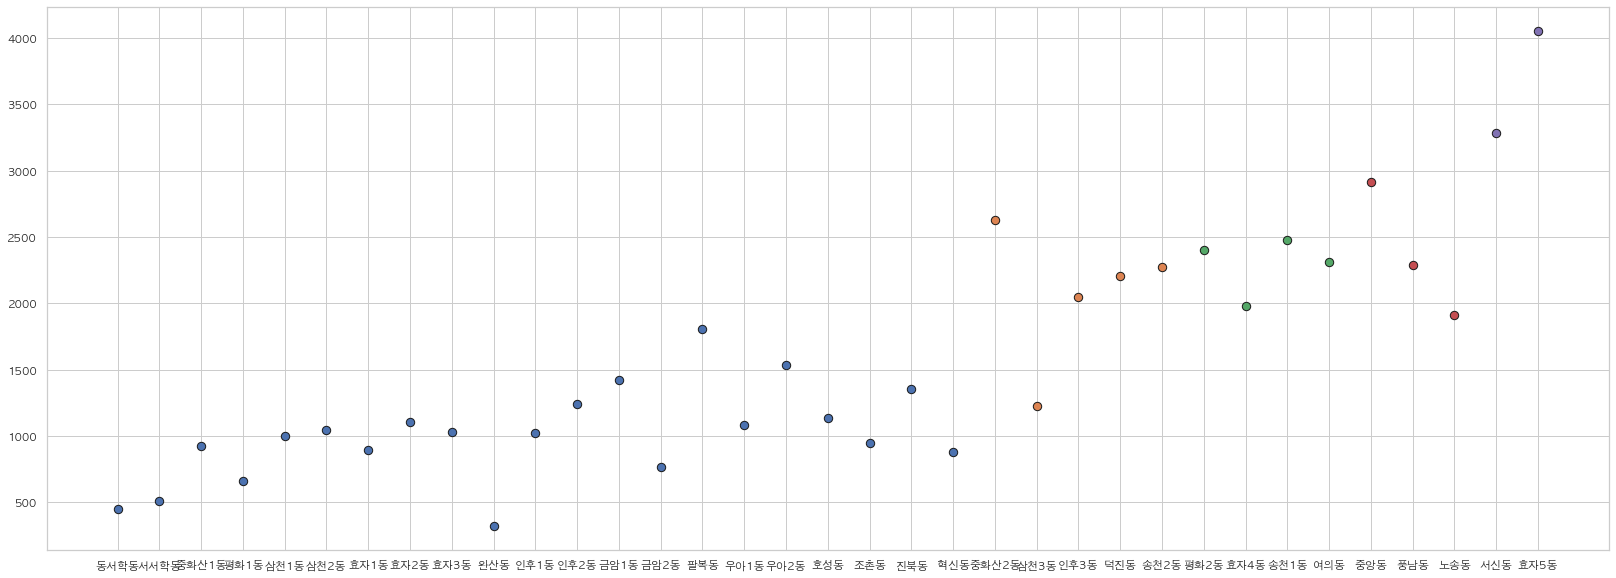

In [471]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['전체산업'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='전체산업'>

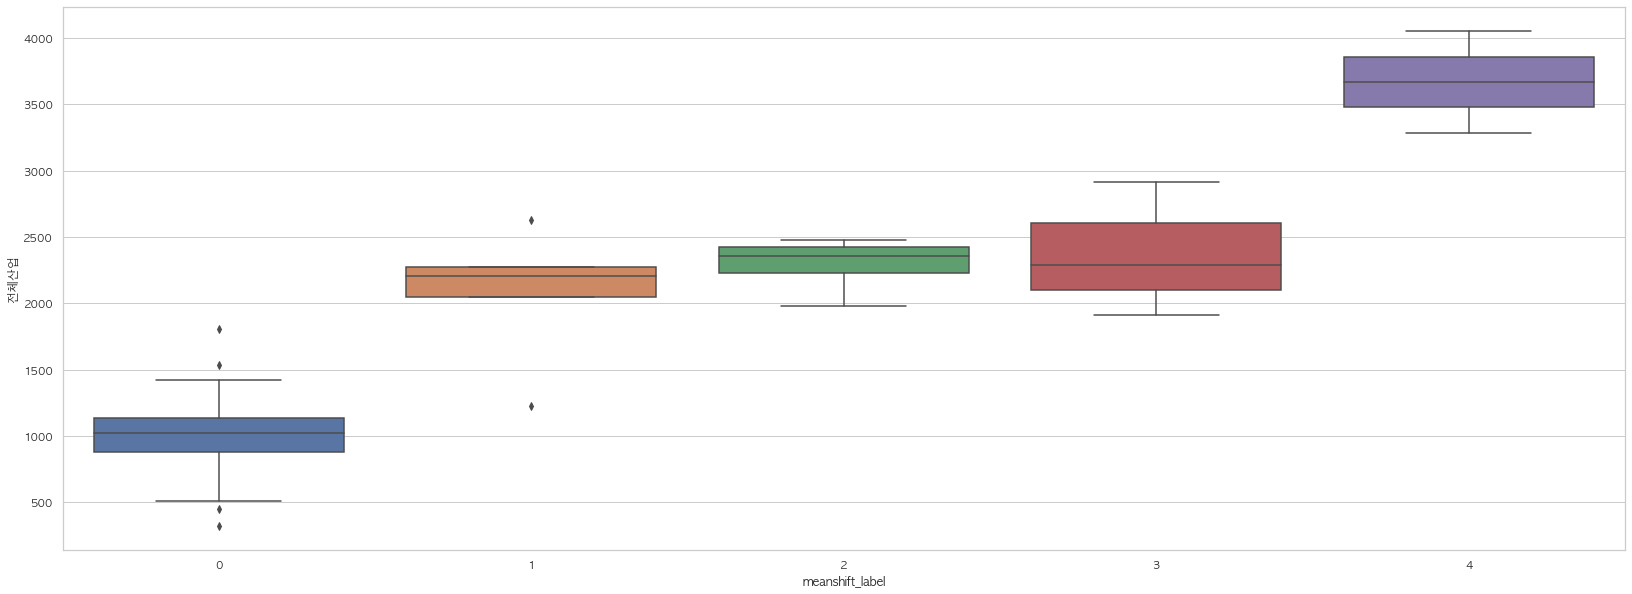

In [472]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="전체산업", data=JJ_DF)

#### 군집별 학교수

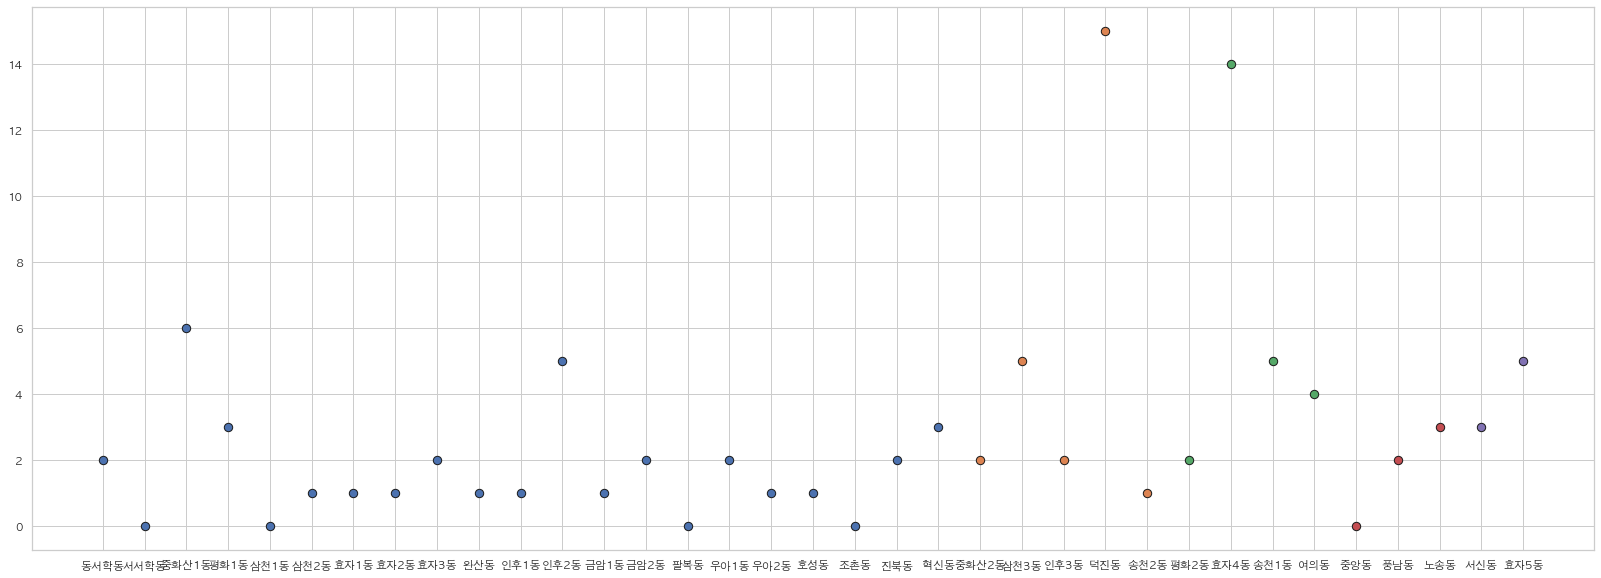

In [473]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['학교수'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='학교수'>

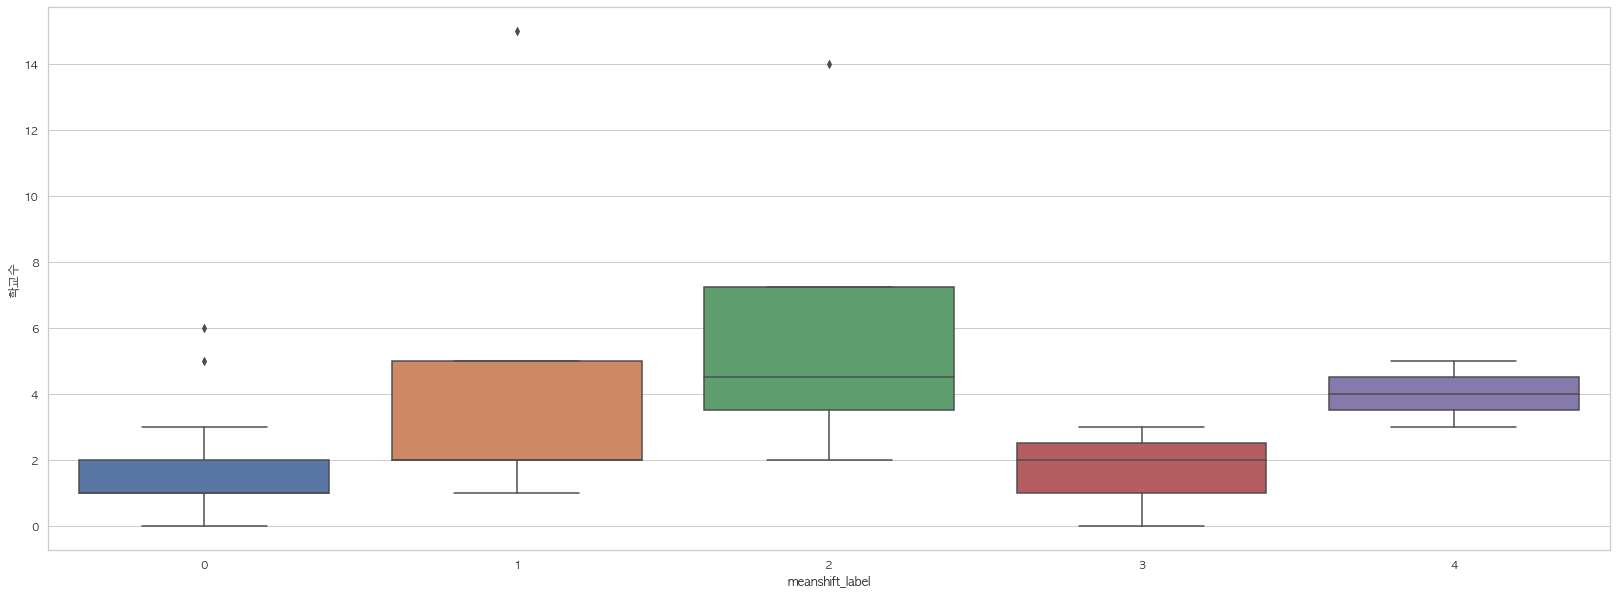

In [474]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="학교수", data=JJ_DF)

#### 군집별 하천 수

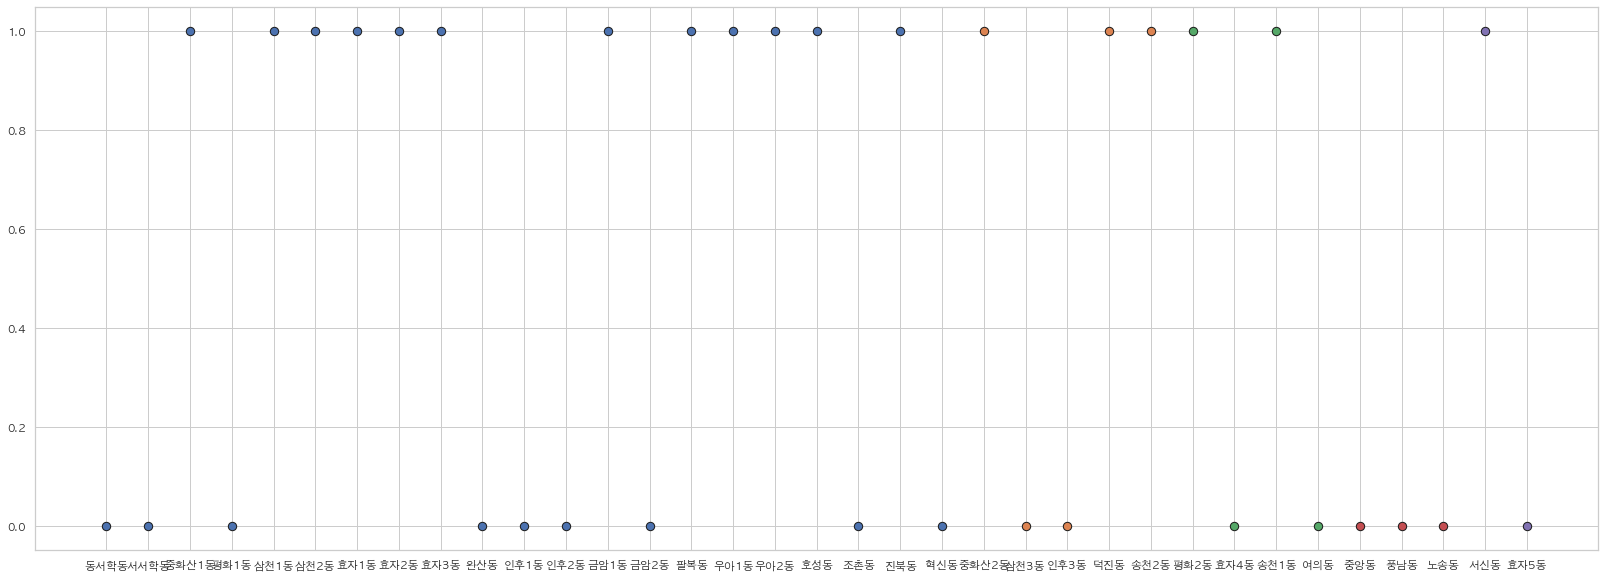

In [476]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['하천'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='하천'>

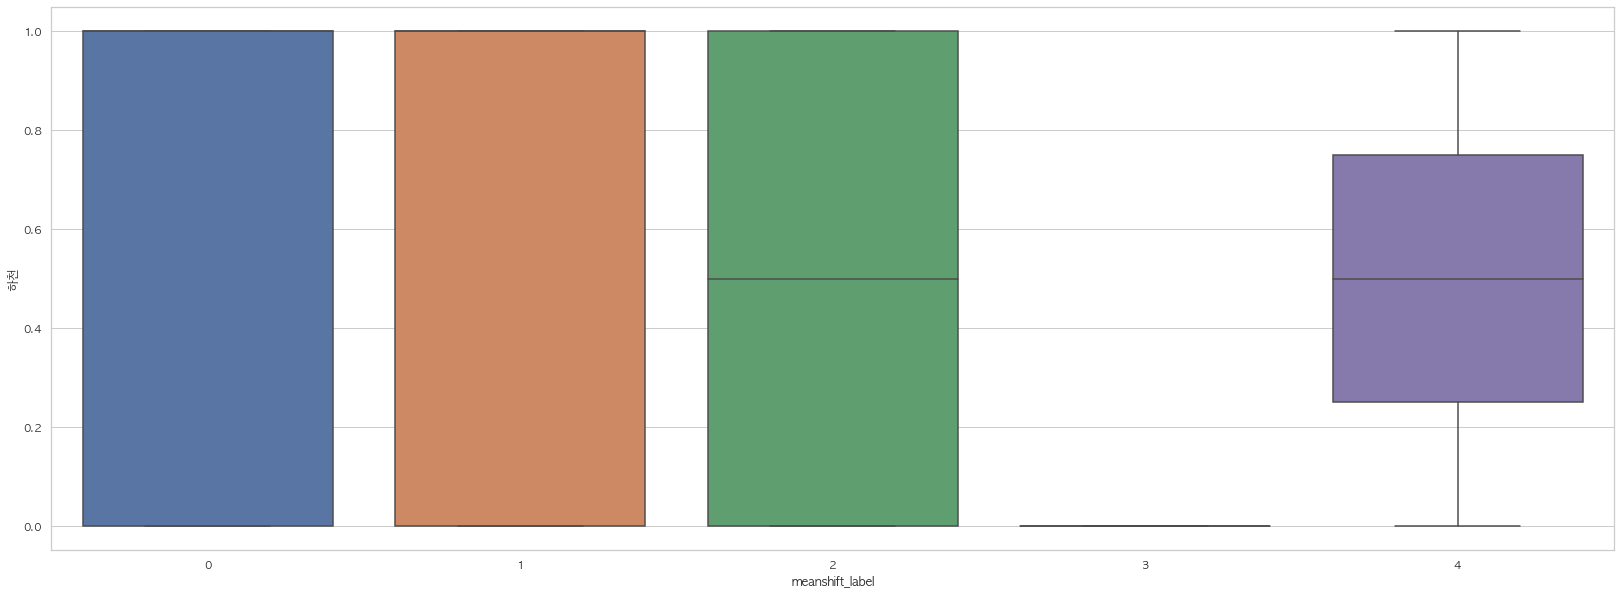

In [475]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="하천", data=JJ_DF)

#### 군집별 유동인구

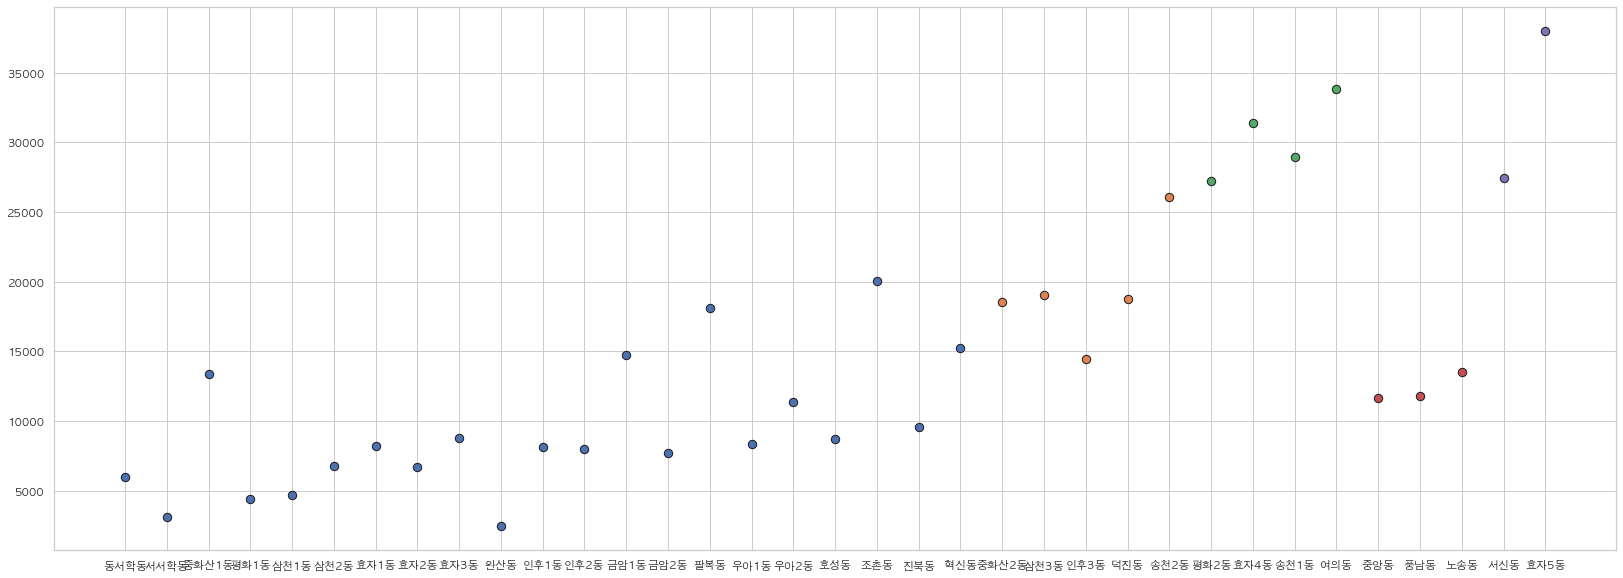

In [478]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['유동인구'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='유동인구'>

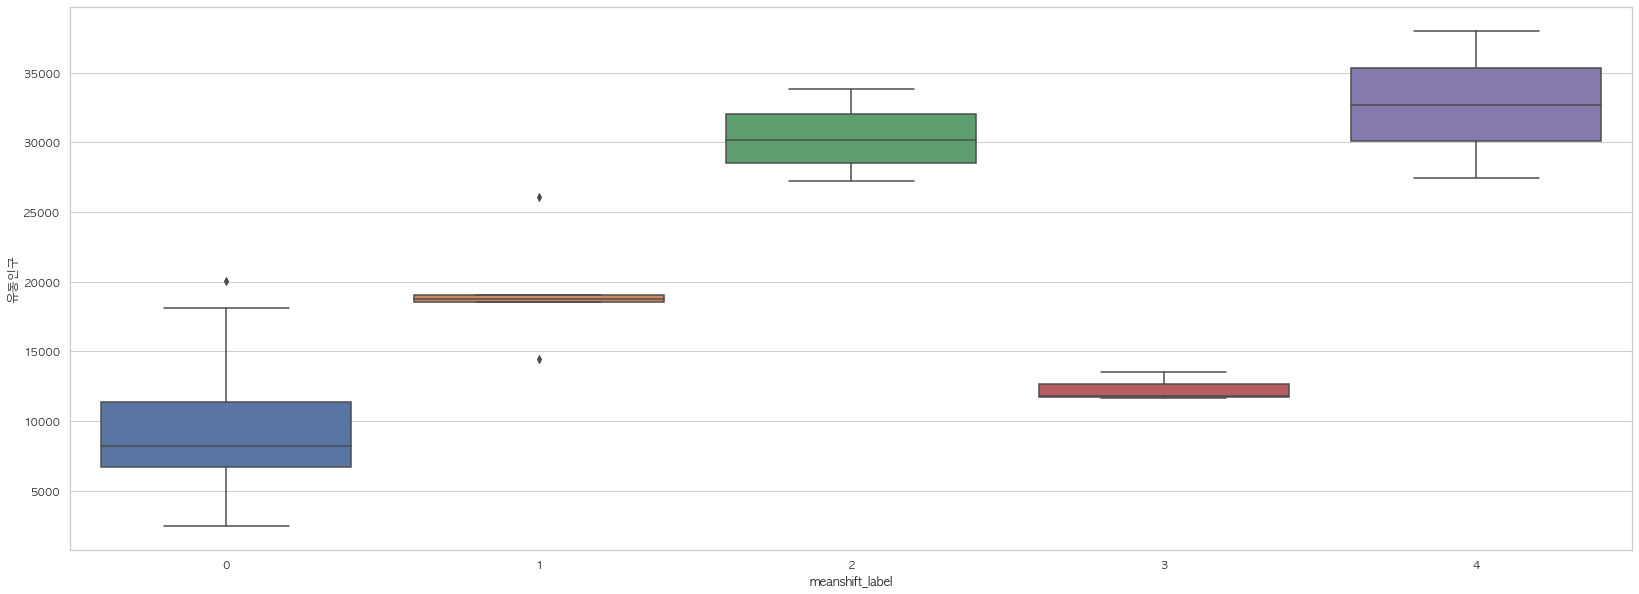

In [479]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="유동인구", data=JJ_DF)

#### 군집별 자전거도로 수

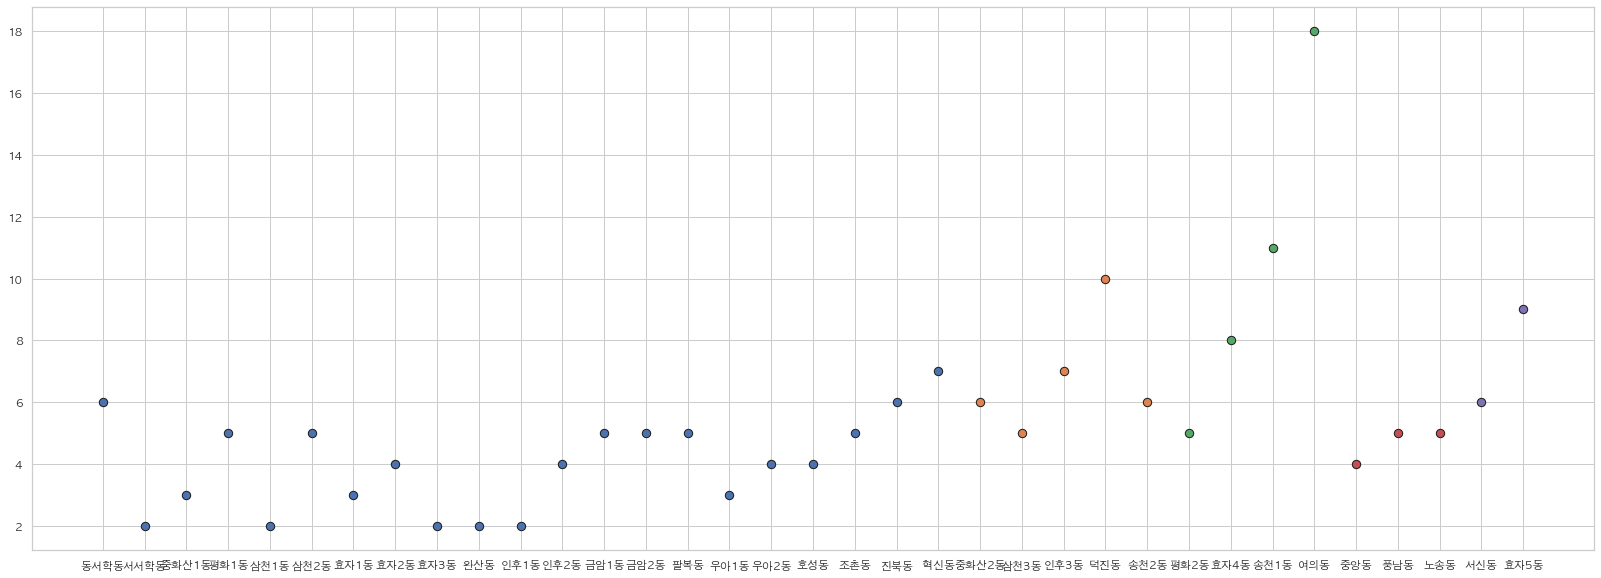

In [484]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['자전거도로갯수'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='자전거도로갯수'>

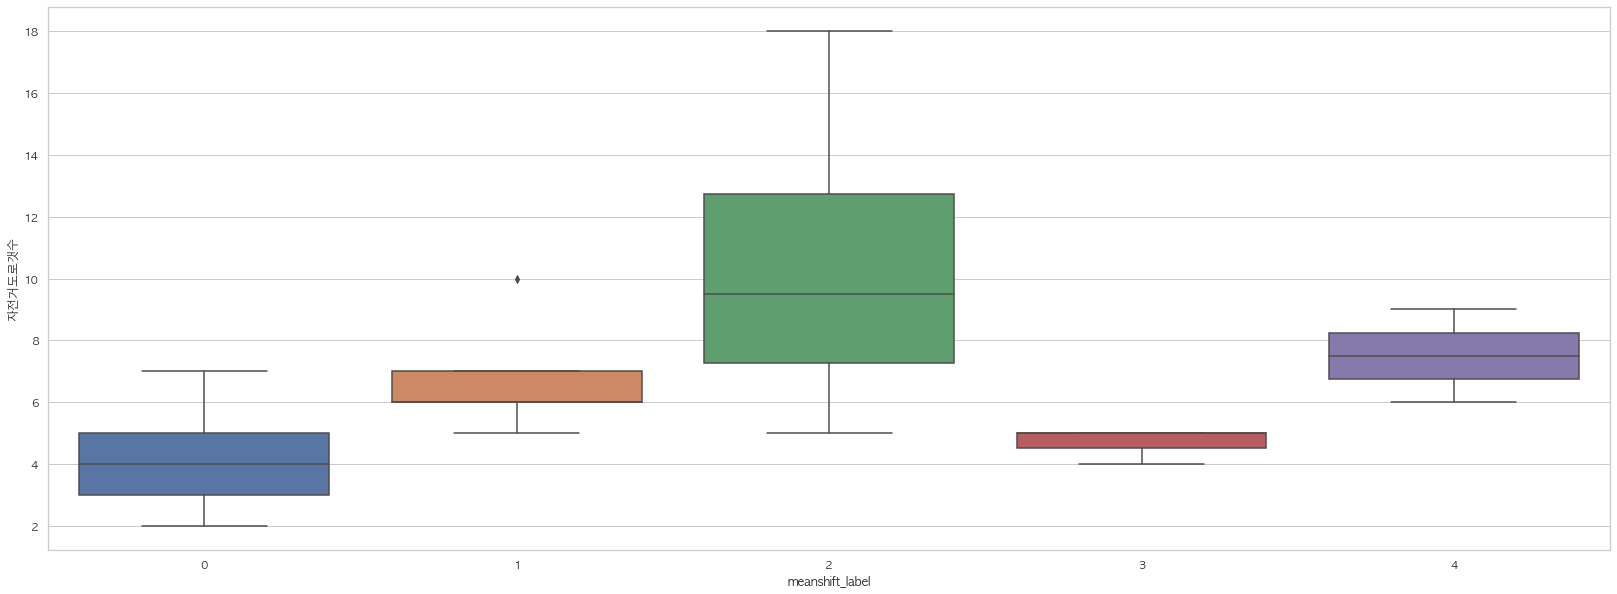

In [481]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="자전거도로갯수", data=JJ_DF)

#### 군집별 버스정류장 수

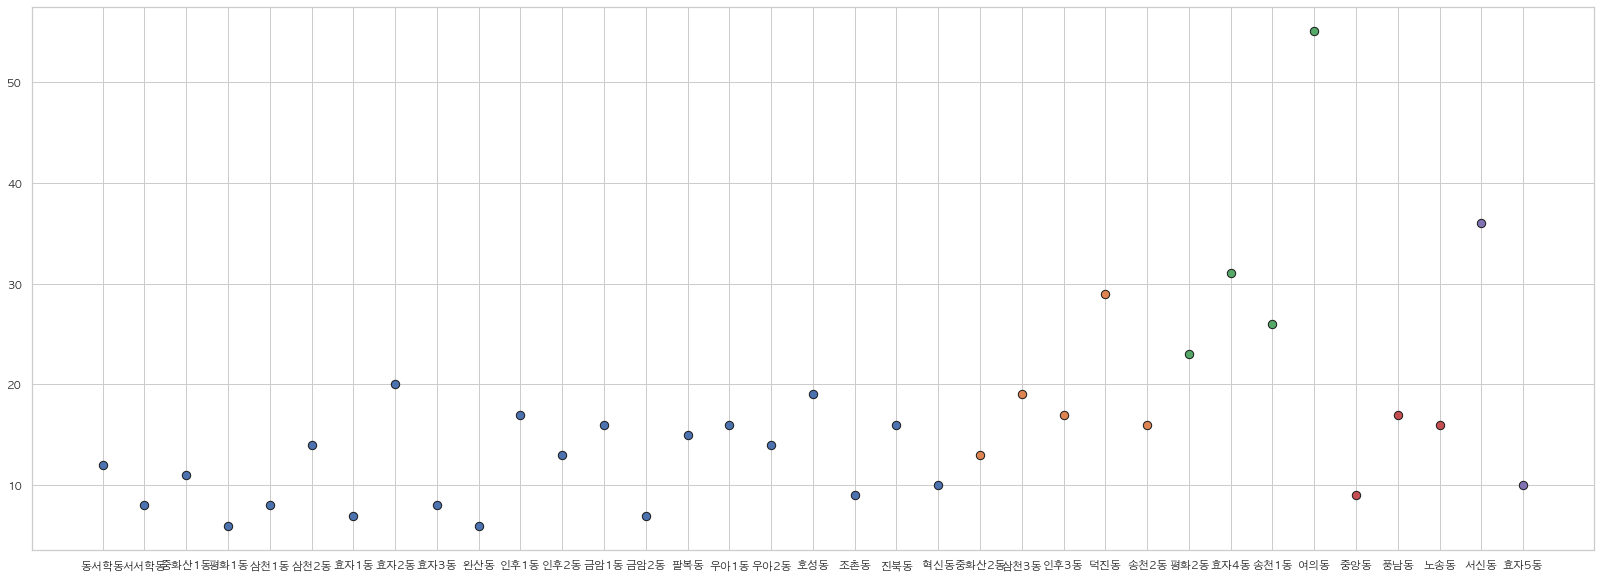

In [482]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['버스정류장 개수'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='버스정류장 개수'>

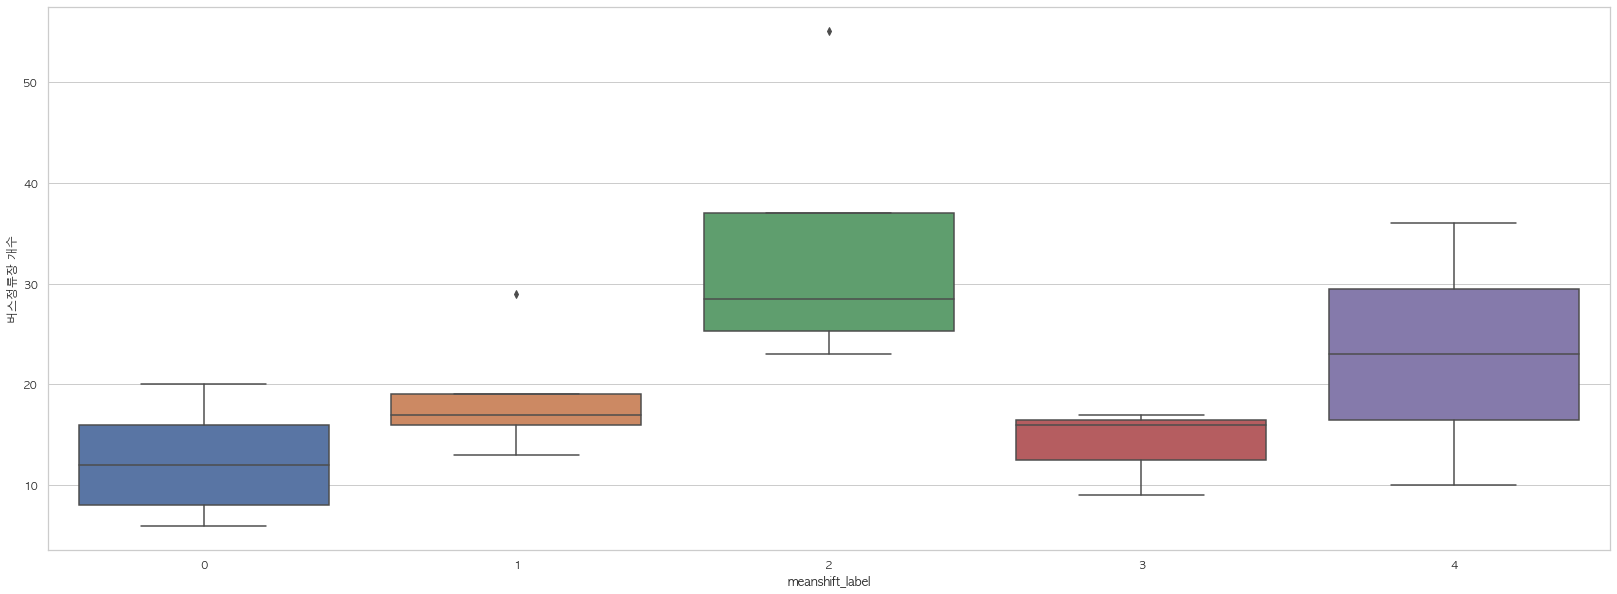

In [480]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="버스정류장 개수", data=JJ_DF)

#### 군집별 총 인구

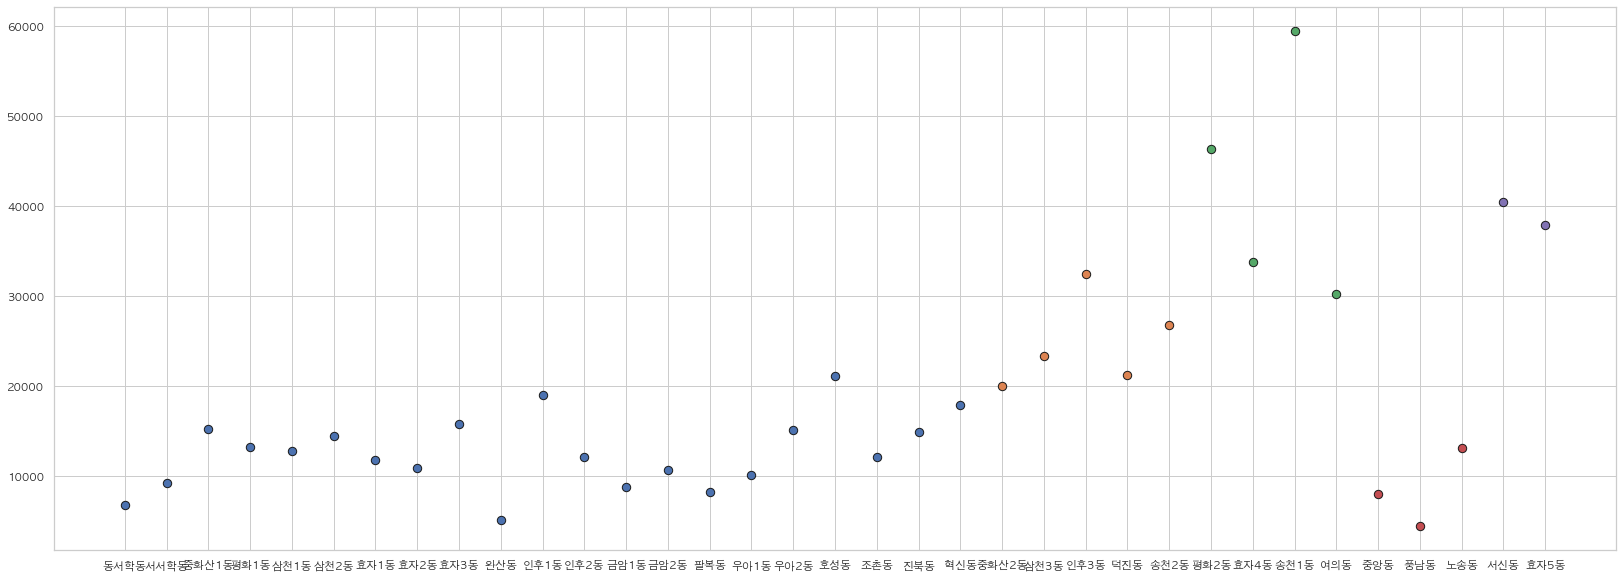

In [485]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['총인구_합계'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='총인구_합계'>

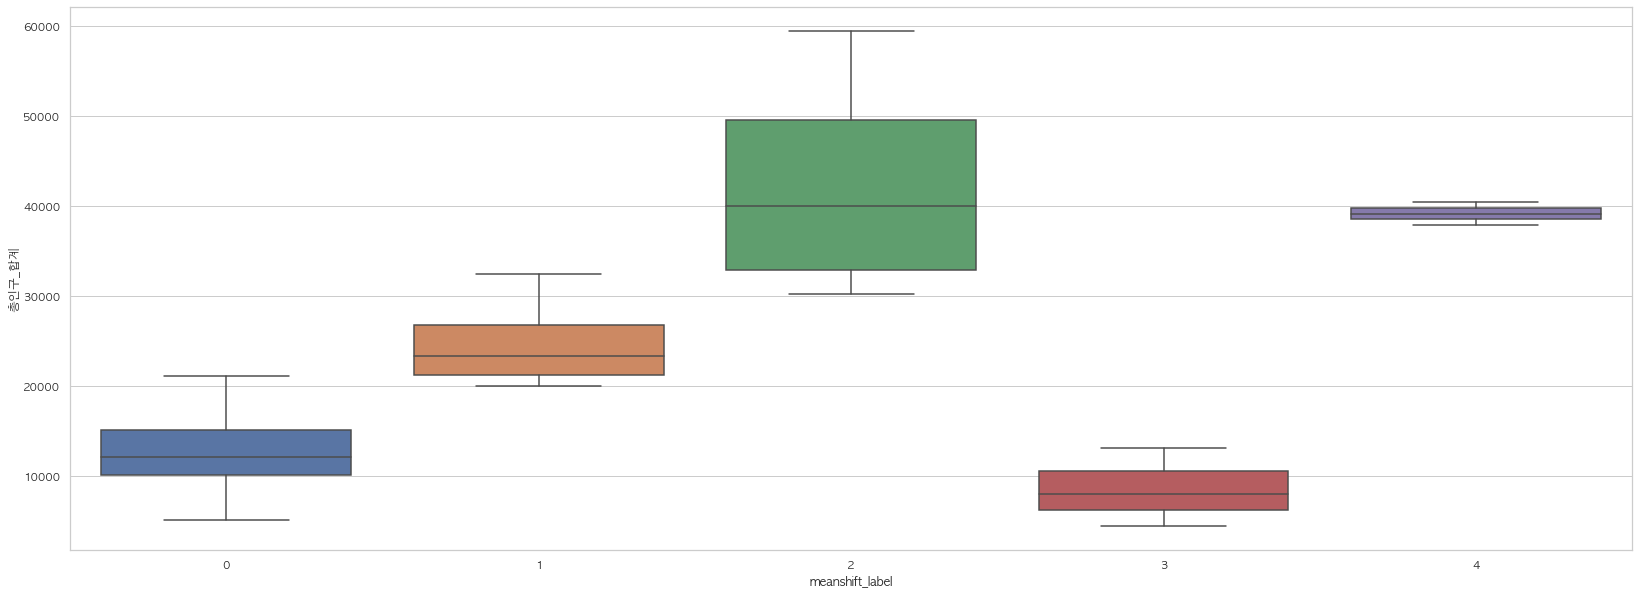

In [486]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="총인구_합계", data=JJ_DF)

#### 군집 별 숙박 음식점 및 소매 사업체 수

In [487]:
JJ_DF['숙박 음식점 및 소매'] = JJ_DF['소매업_자동차_제외_사업체수']+ JJ_DF['숙박_음식점업_사업체수']

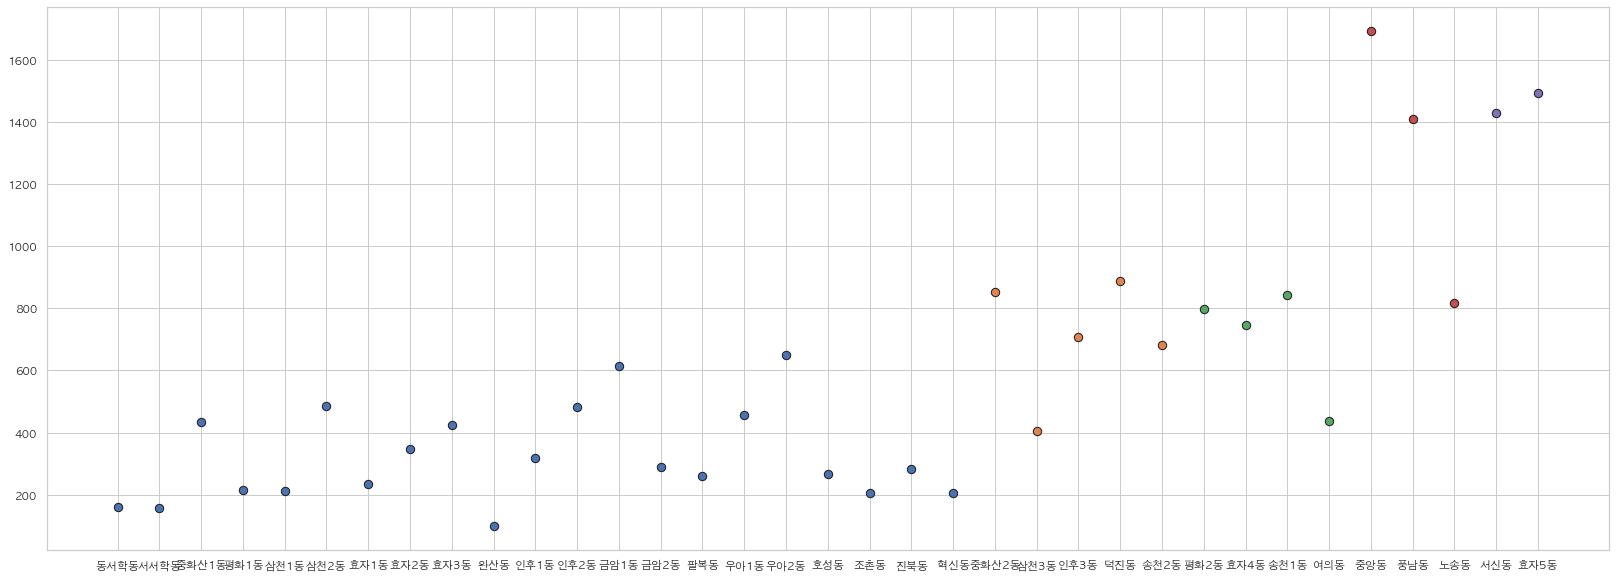

In [488]:
plt.rcParams["figure.figsize"] = (28,10)

rc('font', family='AppleGothic')


unique_labels = [0,1,2,3,4]

for label in unique_labels:
    label_cluster = JJ_DF[JJ_DF['meanshift_label']==label]
    center_x_y = centers[label]
    

    plt.scatter(x=label_cluster['동'], y=label_cluster['숙박 음식점 및 소매'], edgecolor='k', s=70) #, marker=markers[label] 

    
plt.show()

<AxesSubplot:xlabel='meanshift_label', ylabel='숙박 음식점 및 소매'>

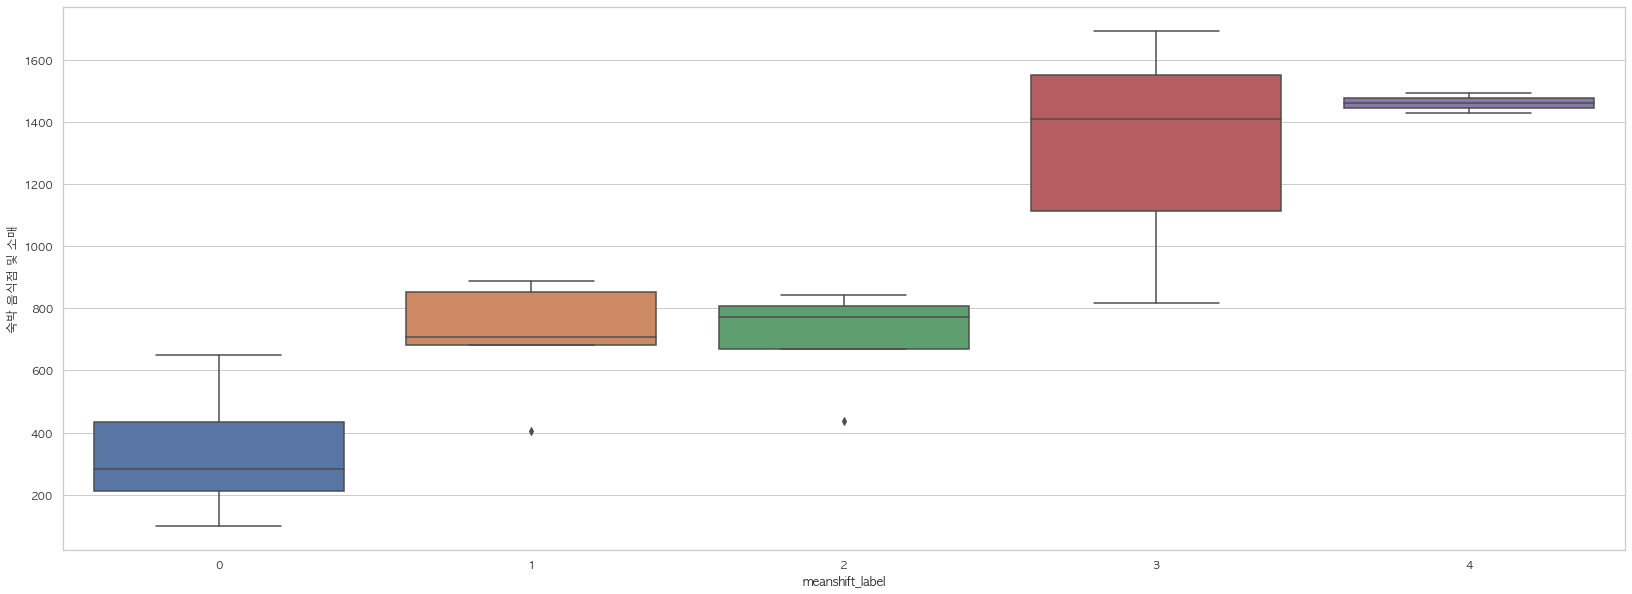

In [489]:
rc('font', family='AppleGothic')
sns.boxplot(x="meanshift_label", y="숙박 음식점 및 소매", data=JJ_DF)

/Users/ojoo/opt/anaconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ojoo/opt/anaconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ojoo/opt/anaconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

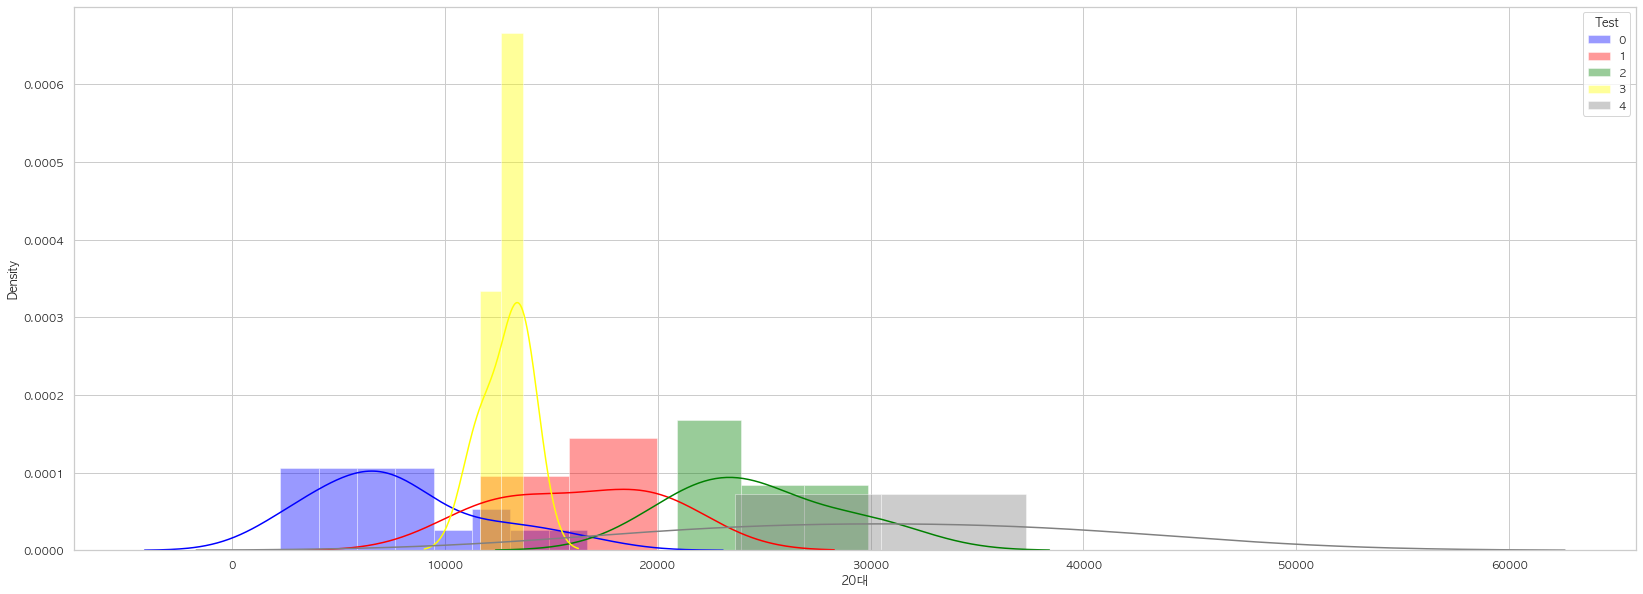

In [492]:
sns.distplot(JJ_DF[JJ_DF.meanshift_label == 0]["20대"], 

             color="blue", label="0")



sns.distplot(JJ_DF[JJ_DF.meanshift_label == 1]["20대"], 

             color="red", label="1")



sns.distplot(JJ_DF[JJ_DF.meanshift_label == 2]["20대"], 

             color="green", label="2")


sns.distplot(JJ_DF[JJ_DF.meanshift_label == 3]["20대"], 

             color="yellow", label="3")


sns.distplot(JJ_DF[JJ_DF.meanshift_label == 4]["20대"], 

             color="grey", label="4")



plt.legend(title="Test")

plt.show()